<a href="https://colab.research.google.com/github/sefayehalilova/ROIM/blob/master/over_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OVERFITTING & UNDERFITTING

**Переобучение:**  

Статистическая модель называется **overfitted**, когда мы обучаем его с большим количеством данных. Когда модель обучается с таким большим количеством данных, она начинает учиться на основе шума и неточных записей данных в нашем наборе данных. Тогда модель неправильно классифицирует данные из-за слишком большого количества деталей и шума. Причинами переобучения являются непараметрические и нелинейные методы, потому что эти типы алгоритмов машинного обучения обладают большей свободой при построении модели на основе набора данных и, следовательно, могут действительно создавать нереалистичные модели. Решением, позволяющим избежать переобучения, является использование линейного алгоритма, если у нас есть линейные данные, или использование таких параметров, как максимальная глубина, если мы используем деревья решений. 

**Недостаточное оснащение:**  

Cтатистическая модель или алгоритм машинного обучения **underfitted**, когда не могут уловить основной тренд данных. Недостаточная экипировка разрушает точность нашей модели машинного обучения. Его появление просто означает, что наша модель или алгоритм недостаточно хорошо вписываются в данные. Обычно это происходит, когда у нас меньше данных для построения точной модели, а также когда мы пытаемся построить линейную модель с нелинейными данными. В таких случаях правила модели машинного обучения слишком просты и гибки, чтобы применять их к таким минимальным данным, и, следовательно, модель, вероятно, сделает много неправильных прогнозов. Недостаточного соответствия можно избежать, используя больше данных, а также уменьшая количество функций за счет выбора функций.




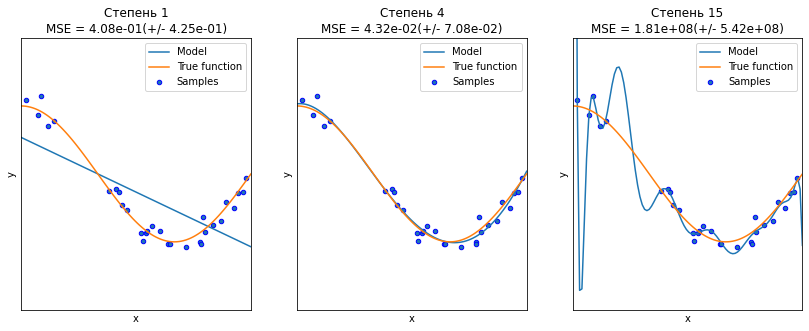

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Степень {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()
    


На графике показана функция, которую мы хотим аппроксимировать, которая является частью функции косинуса. Кроме того, отображаются образцы из реальной функции и аппроксимации различных моделей. Модели имеют полиномиальные особенности разной степени. Мы видим, что линейная функция (полином со степенью 1) недостаточна для подбора обучающих выборок. Это называется **underfitting(недостаточное оснащение)**. Многочлен степени 4 почти идеально приближает истинную функцию. Тем не менее, для более высоких степеней модель будет соответствовать обучающим данным, т.е. она узнает шум обучающих данных. Далее оцениваем количественно **overfitting / underfitting** с помощью перекрестной проверки. Рассчитываем среднеквадратическую ошибку (MSE) на проверочном наборе: чем она выше, тем меньше вероятность того, что модель будет правильно обобщена на данных обучения.

